In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
ALL = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
    [2, 1],
    [1, 2],
    [2, 2],
    [3, 2],
    [6, 6],
    [7, 6],
    [8, 6],
    [6, 7],
    [7, 7],
    [8, 7],
    [9, 7],
    [7, 8],
    [8, 8],
    [9, 8],
    [8, 9],
    [9, 9],
])

In [3]:
label = np.array([*[0] * 8, *[1] * 12])

In [4]:
class_example = DecisionTreeClassifier(criterion="entropy")
class_example = class_example.fit(ALL, label)

In [5]:
class_example.predict([[0, 0]])

array([0])

[Text(0.5, 0.75, 'X[1] <= 4.0\nentropy = 0.971\nsamples = 20\nvalue = [8, 12]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]')]

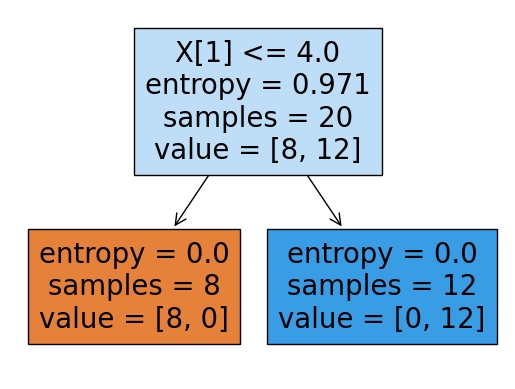

In [6]:
from sklearn.tree import plot_tree
plot_tree(class_example, filled=True)

In [7]:
label_end = np.array([])
for _ in range(ALL.shape[0]):
    label_example = class_example.predict([[ALL[_, 0], ALL[_, 1]]])
    label_end = np.hstack([label_end, label_example])

In [8]:
label_end

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

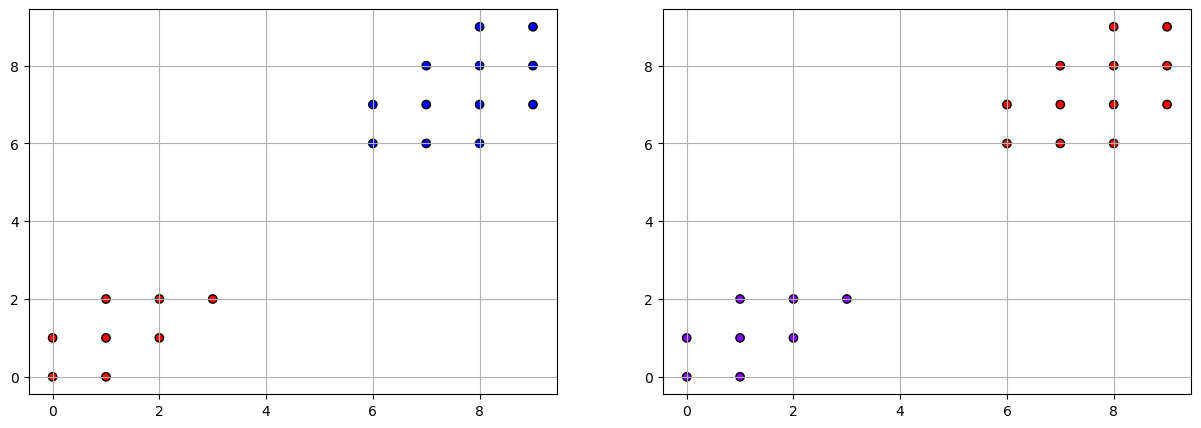

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


cm_bright = ListedColormap(["#FF0000", "#0000FF"])
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
plt.scatter(ALL[:, 0], ALL[:, 1], c=label, cmap=cm_bright, edgecolors="k")
ax.grid(True)
ax = fig.add_subplot(122)
plt.scatter(ALL[:, 0], ALL[:, 1], c=label_end, cmap="rainbow", edgecolors="k")
ax.grid(True)

In [10]:
from sklearn.tree import DecisionTreeRegressor


regr_example = DecisionTreeRegressor(max_depth=5)
regr_example = regr_example.fit(ALL, label)
regr_example.predict([[1, 1]])

array([0.])

In [11]:
label_regr_end = np.array([])
for _ in range(ALL.shape[0]):
    label_regr_example = class_example.predict([[ALL[_, 0], ALL[_, 1]]])
    label_regr_end = np.hstack([label_regr_end, label_regr_example])

[Text(0.5, 0.75, 'X[1] <= 4.0\nsquared_error = 0.24\nsamples = 20\nvalue = 0.6'),
 Text(0.25, 0.25, 'squared_error = 0.0\nsamples = 8\nvalue = 0.0'),
 Text(0.75, 0.25, 'squared_error = 0.0\nsamples = 12\nvalue = 1.0')]

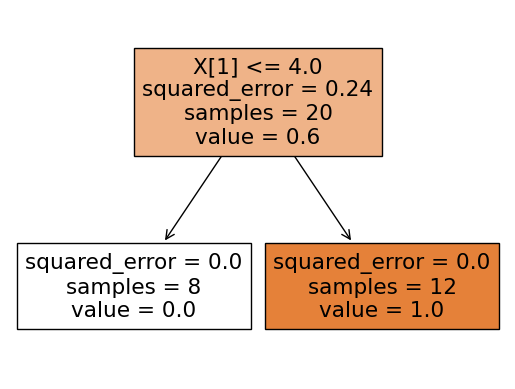

In [12]:
plot_tree(regr_example, filled=True)

In [13]:
from sklearn.tree import export_text
r = export_text(regr_example)
r

'|--- feature_1 <= 4.00\n|   |--- value: [0.00]\n|--- feature_1 >  4.00\n|   |--- value: [1.00]\n'

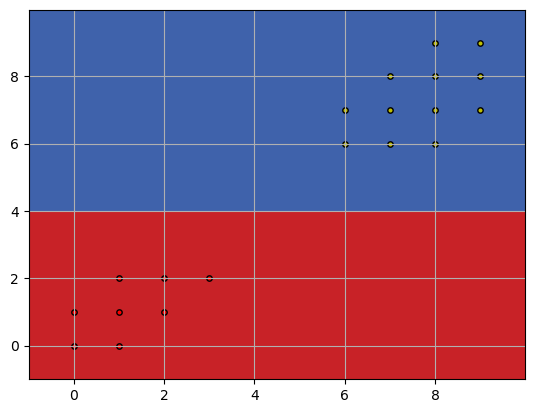

In [14]:
n_classes = 2
plot_colors = "ryb"
plot_step = .02

x_min, x_max = ALL[:, 0].min() - 1, ALL[:, 0].max() + 1
y_min, y_max = ALL[:, 0].min() - 1, ALL[:, 0].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=.5, w_pad=.5, pad=2.5)

Z = regr_example.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for _, color in zip(range(n_classes), plot_colors):
    idx = np.where(label == _)
    plt.scatter(
        ALL[idx, 0],
        ALL[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.grid()

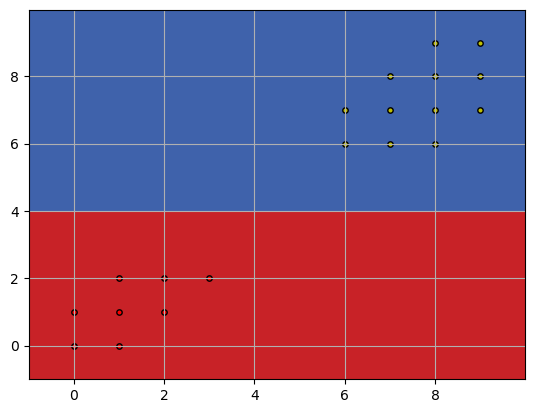

In [15]:
n_classes = 2
plot_colors = "ryb"
plot_step = .02

x_min, x_max = ALL[:, 0].min() - 1, ALL[:, 0].max() + 1
y_min, y_max = ALL[:, 0].min() - 1, ALL[:, 0].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)
plt.tight_layout(h_pad=.5, w_pad=.5, pad=2.5)

Z = class_example.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
for _, color in zip(range(n_classes), plot_colors):
    idx = np.where(label == _)
    plt.scatter(
        ALL[idx, 0],
        ALL[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.grid()